In [15]:
import os
import matplotlib
import statsmodels
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.tsa.holtwinters as hw
import statsmodels.tsa as t
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv(r"C:\Users\pawan\Desktop\New folder\AC_Data.csv")

In [3]:
data = data.rename(columns={"0":"Date"})

In [4]:
data = data.dropna()
data["Date"] = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in list(data["Date"])]

In [5]:
data["Date"].iloc[0]

Timestamp('2019-08-01 00:00:00')

In [6]:
data = data.set_index("Date")

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis of normal distribution: -0.039101862305986224
Skewness of normal distribution: 0.7917135442404973


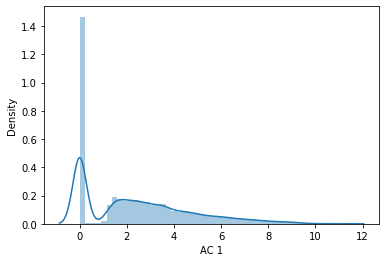

In [7]:
import seaborn as sns
from scipy import stats
sns.distplot(data["AC 1"]);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data["AC 1"])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data["AC 1"])))

If the skewness is :<p>
-0.5 <score< 0.5 : fairly symmetrical<p>
-1 <score< — 0.5 or  0.5 <score< 1 : moderately skewed <p>
-1 >score> 1 : highly skewed<p>
    
If the kurtosis is close to 0 it's normally distributed.

Our data is not far from the normal. <p>
Let's see some other plots and check about it's stationarity.

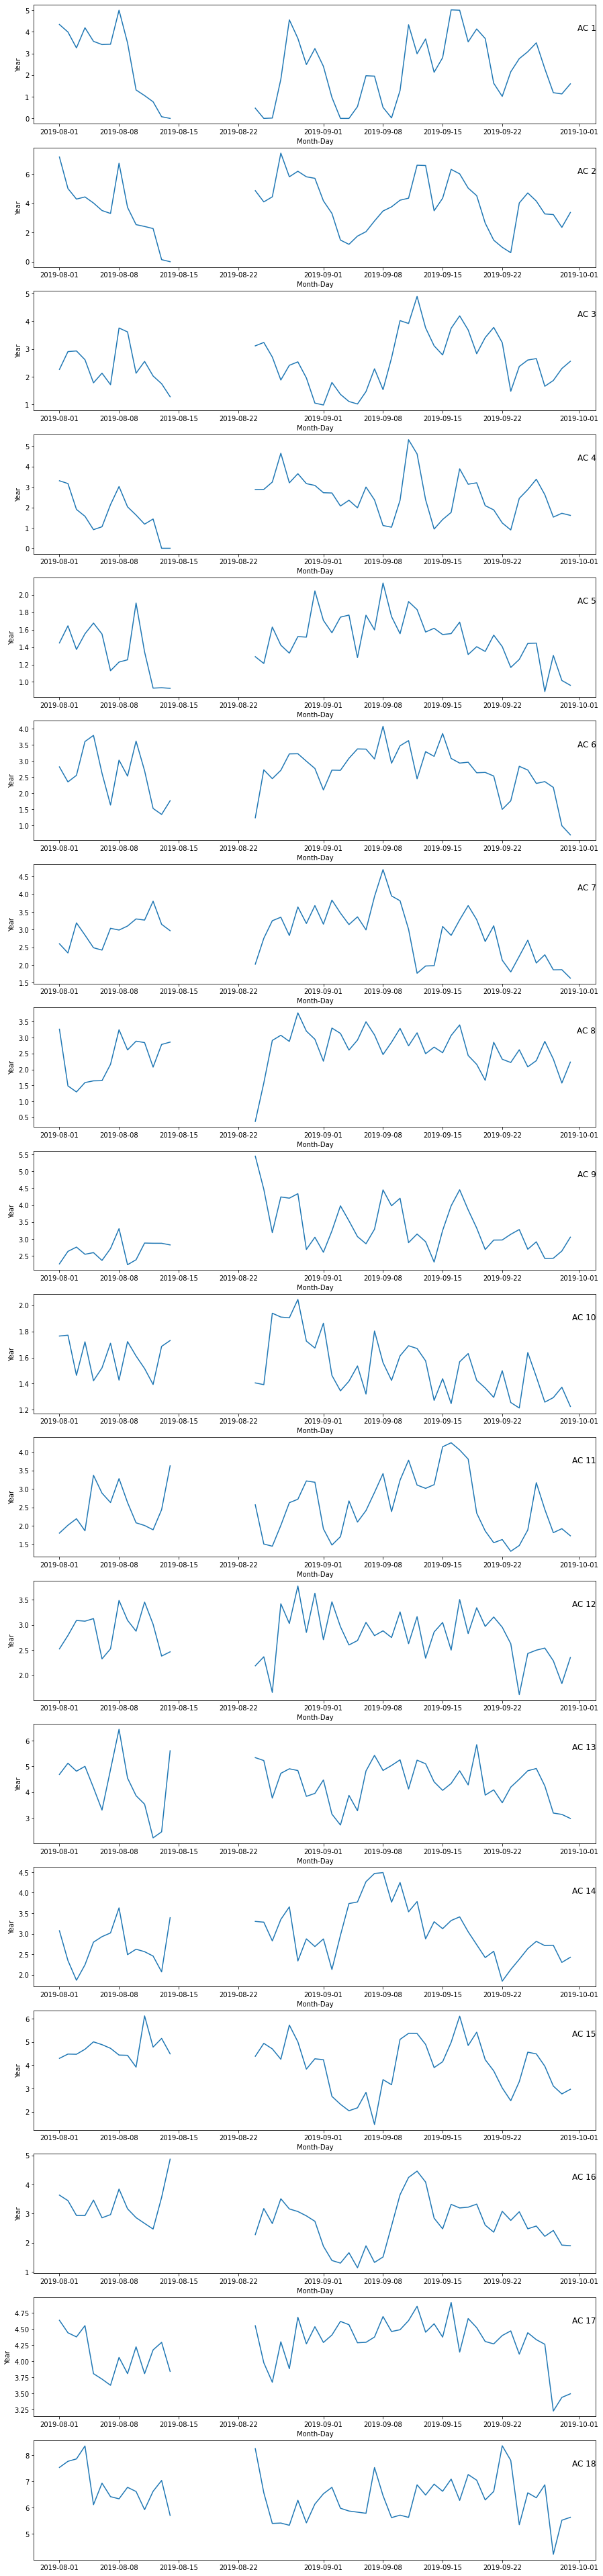

In [8]:
plt.figure(figsize=(15, 70))
for i in range(1,19):
    values = data[list(data.columns)[i-1]].resample('D').agg(['mean'])
    plt.xlabel("Month-Day")
    plt.ylabel("Year")
    plt.subplot(data.shape[1], 1, i)
    plt.plot(values["mean"])
    plt.title(list(data.columns)[i-1], y=0.75, loc='right')
    i += 1
plt.show()

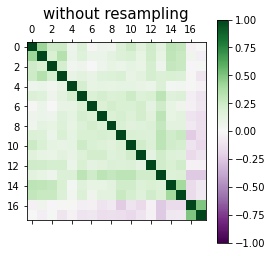

In [9]:
plt.matshow(data.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

# Moving average 

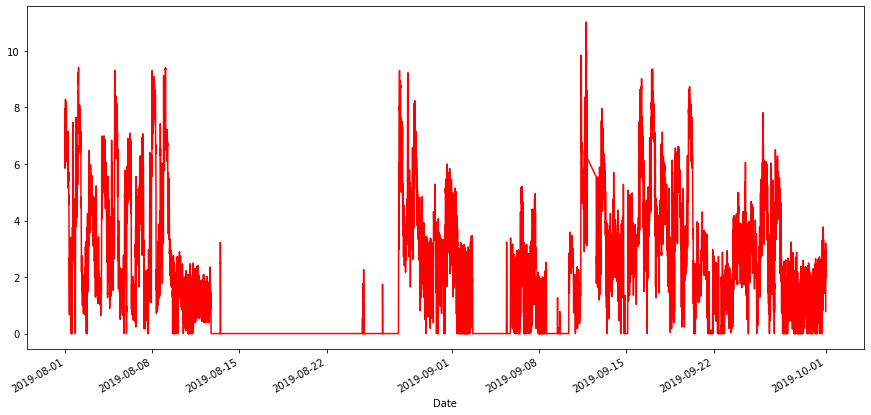

In [10]:
rollingseries = data["AC 1"].rolling(window=7)
plt.figure(figsize=(15, 7))
rollingmean = rollingseries.mean() #we can compute any statistical measure
rollingmean.plot(color="red")
plt.show()

# Exponential Smoothing

C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


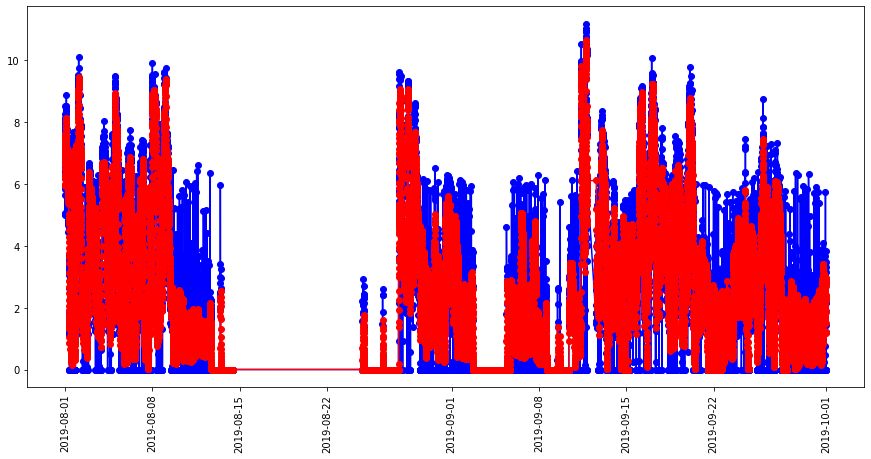

In [11]:
fit1 = hw.SimpleExpSmoothing(data["AC 1"]).fit(smoothing_level=0.2, optimized=False)
plt.figure(figsize=(15, 7))
plt.plot(data["AC 1"], marker='o', color="b", label="Original")
plt.plot(fit1.fittedvalues, marker="o", color="r", label="Smoothing")
plt.xticks(rotation="vertical")
plt.show()

# Holt method for exponential smoothing

C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


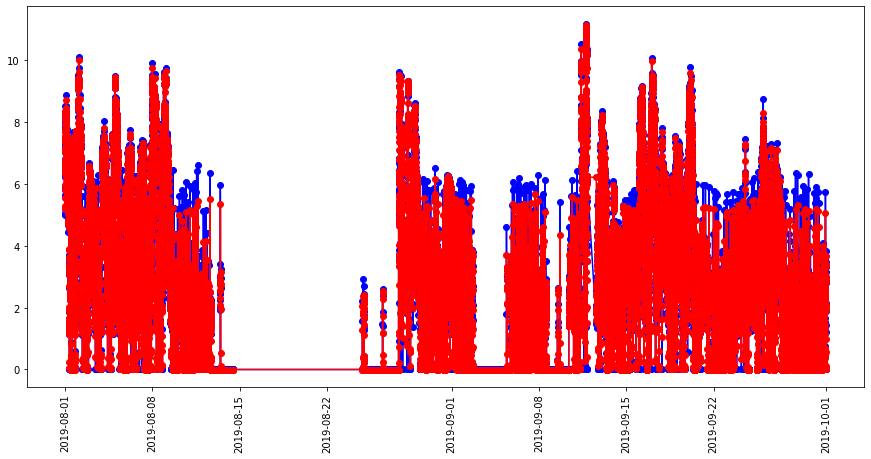

In [12]:
fit1 =  statsmodels.tsa.holtwinters.Holt(data["AC 1"]).fit()
plt.figure(figsize=(15, 7))
plt.plot(data["AC 1"], marker='o', color='b')
plt.plot(fit1.fittedvalues, marker='o', color='r')
plt.xticks(rotation="vertical")
plt.show()

These all are smoothing technique for the time series data.
<p>By looking into moving average we can say that it has two type of pattern daily wise as well as weekly.</p>

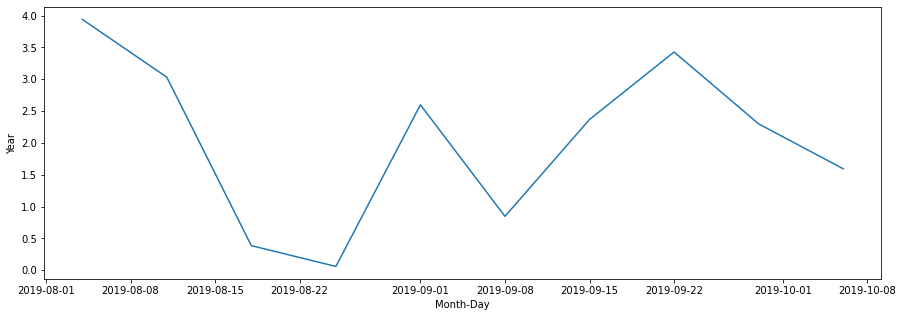

In [13]:
plt.figure(figsize=(15, 5))
values = data["AC 1"].resample('W').agg(['mean'])
plt.xlabel("Month-Day")
plt.ylabel("Year")
# plt.subplot(data.shape[1], 1, i)
plt.plot(values["mean"])

It looks like we have less data to depict any pattern on weekly basis.

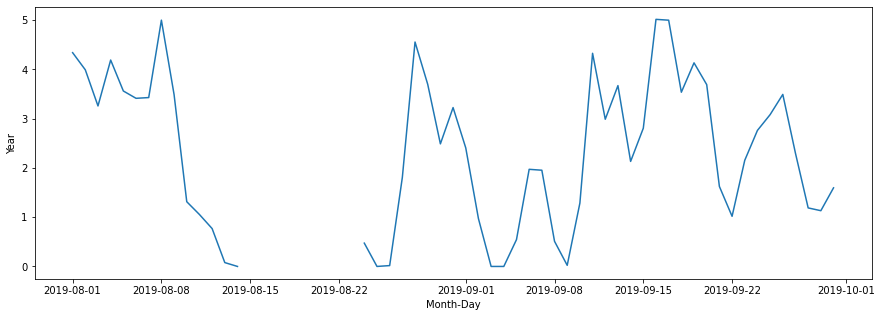

In [18]:
plt.figure(figsize=(15, 5))
values = data["AC 1"].resample('D').agg(['mean'])
plt.xlabel("Month-Day")
plt.ylabel("Year")
# plt.subplot(data.shape[1], 1, i)
plt.plot(values["mean"])

But on daily base data we can see maximum time a slightly increase in the power consumption on every 5th day in 9th month in 8th month it is not clearly visible due to missing of data maybe.

# Decomposition

In [19]:
# Additive Decomposition
add_result = seasonal_decompose(data['AC 1'], model='additive',period=1)

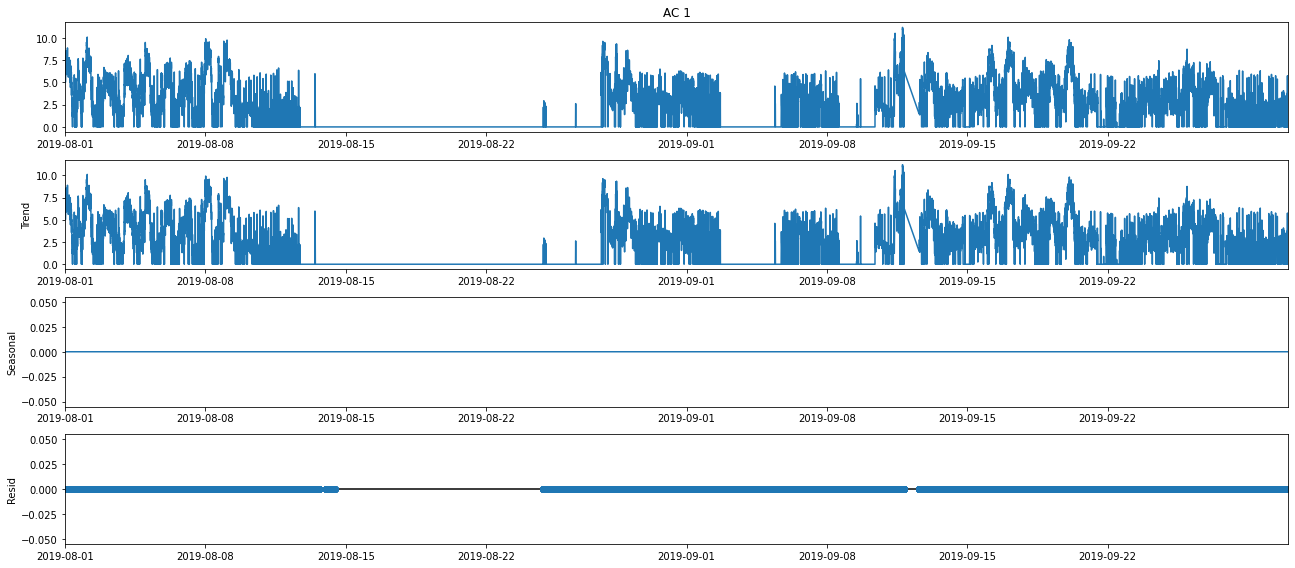

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = t.seasonal.seasonal_decompose(data["AC 1"], model='additive', period=1)
fig = decomposition.plot()
plt.show()

So seasonality is not there for all the AC components.(I have checked them all)<p>
But it doesn't implies stationarity of the data.

# Testing stationarity:

Stationary is constantly mean and constant variance.

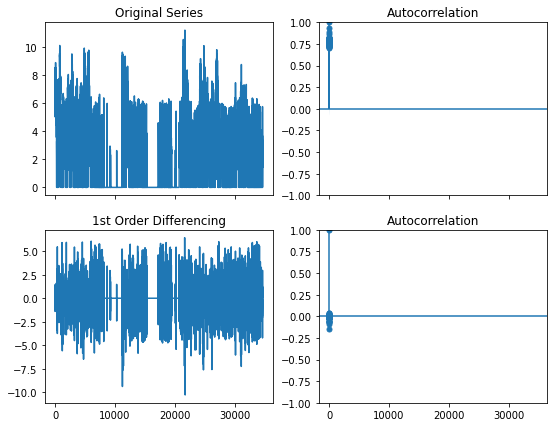

In [26]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7)})


# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(list(data["AC 1"])); axes[0, 0].set_title('Original Series')
plot_acf(data["AC 1"], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(list(data["AC 1"].diff())); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data["AC 1"].diff().dropna(), ax=axes[1, 1])

plt.show()

Series need to be differenced for making it stationary.
But here you can see the series is probably over-differenced.

We can also see in the 1st order time series goes negative very fastly. So we can clearly say that it is over differenced. 
Hence we will assume that our dataset is already stationary, but to proof that we will do a test

### Null hypothesis : Time series are non-stationary. 
If the p-value is less than 5 percent then reject the NULL hypothesis else accept the NULL hypothesis.

In [27]:
from statsmodels.tsa.stattools import adfuller
result = pd.DataFrame(columns=["AC", "p-value"])
for i in range(18):
    adfuller_result = adfuller(data[list(data.columns)[i]].values, autolag='AIC')
    result = result.append({
        "AC" : list(data.columns)[i], 
        "p-value" : adfuller_result[1], 
        "Stationarity": True if adfuller_result[1]>0.05 else False
    }, ignore_index=True)
    
print(result)

       AC       p-value  Stationarity
0    AC 1  2.687286e-11           0.0
1    AC 2  5.232802e-10           0.0
2    AC 3  3.477729e-13           0.0
3    AC 4  5.992070e-12           0.0
4    AC 5  3.269771e-26           0.0
5    AC 6  8.617634e-16           0.0
6    AC 7  1.598242e-20           0.0
7    AC 8  2.207092e-18           0.0
8    AC 9  2.724393e-19           0.0
9   AC 10  3.564661e-20           0.0
10  AC 11  3.838577e-16           0.0
11  AC 12  3.016491e-21           0.0
12  AC 13  5.212503e-24           0.0
13  AC 14  3.731333e-18           0.0
14  AC 15  2.654839e-17           0.0
15  AC 16  6.362945e-17           0.0
16  AC 17  2.457258e-28           0.0
17  AC 18  7.643486e-26           0.0


here all p-values are less than 5%. So we can reject the null hypothesis for all columns.

Now for implementing ARIMA model we will be required some parameters p, q, d.

Hence, we already know in this point that d = 0 is required for a stationary time series.

Now we will search for AR model and MA model to find out p, q values.

### PACF

C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


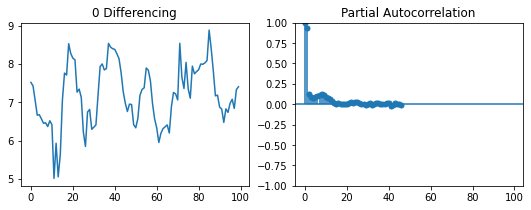

In [28]:
plt.rcParams.update({'figure.figsize':(9,3)})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(list(data["AC 1"].iloc[:100])); axes[0].set_title('0 Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data["AC 1"].dropna(), ax=axes[1])

plt.show()

You can observe that the PACF lag 1 is quite significant since is well above the significance line. then p=1

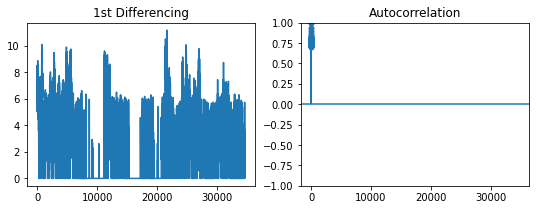

In [31]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(list(data["AC 1"].iloc[:100])); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data["AC 1"].dropna(), ax=axes[1])

plt.show()

Couple of lags are well above the significance line. 
So, let’s tentatively fix q as 50. 

If your series is slightly under differenced, adding one or more additional AR terms usually makes it up. 

Likewise, if it is slightly over-differenced, try adding an additional MA term.

So final parameter are : d = 0, p = 1, q = 51

In [37]:
#  ARIMA Model(p,d,q)
model = ARIMA(data["AC 1"], order=(1,0,51))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                   AC 1   No. Observations:                34642
Model:                ARIMA(1, 0, 51)   Log Likelihood              -39746.929
Date:                Mon, 13 Dec 2021   AIC                          79601.859
Time:                        15:19:01   BIC                          80058.311
Sample:                             0   HQIC                         79747.321
                              - 34642                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3942      0.273      8.769      0.000       1.859       2.929
ar.L1          0.9963      0.001   1343.407      0.000       0.995       0.998
ma.L1         -0.2720      0.003    -89.610      0.0

The P Values of the AR1 and MA1..51 terms are highly significant (<< 0.05).

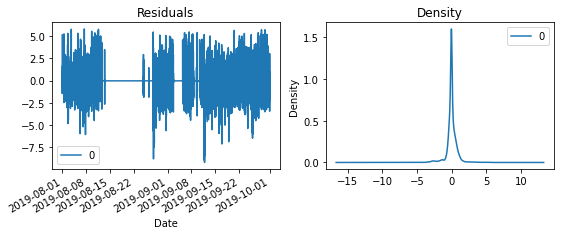

In [38]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [50]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data["AC 1"].iloc[:int(data.shape[0]*.80)]
test = data["AC 1"].iloc[int(data.shape[0]*.80):]

In [18]:
model = ARIMA(train, order=(1, 0, 51))  
fitted = model.fit()  

C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [80]:
# Forecast
fc = fitted.forecast(15, alpha=0.05)
fc

C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


27713    3.294551
27714    3.384861
27715    3.396917
27716    3.339774
27717    3.286414
27718    3.188047
27719    3.056677
27720    2.957293
27721    2.889081
27722    2.959882
27723    2.981794
27724    3.013838
27725    3.120520
27726    3.208406
27727    3.237249
Name: predicted_mean, dtype: float64

These are the next 15 forecast for the AC 1.

In [51]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

<ipython-input-51-901c04103e5c>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-51-901c04103e5c>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': inf,
 'me': 0.4922117737074925,
 'mae': 1.4276998170244555,
 'mpe': inf,
 'rmse': 1.76266291819464,
 'acf1': nan,
 'corr': -0.008270270997489164,
 'minmax': 0.4856441004227118}

There are mulitple different way to do this forecasting in this time series like as using convolution model, some lstm architecture etc.
I have implemnted those models in some other dataset you can have a look here. [https://github.com/Pawan300/Stock-market-analysis/blob/master/Stock_market_analysis.ipynb]

In [90]:
np.argmax(data.describe().loc["mean"]), np.argmin(data.describe().loc["mean"])

(17, 4)

These are the numbers of the AC which uses maximum average power and minimum aerage power respectively.